# <h1> Downloading and extracting data:<h1/>

- Source: https://www.kaggle.com/c/mercari-price-suggestion-challenge/data

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/7559/44327/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1663739558&Signature=xIRNMY5sgr%2BsrWPevdE2Ob21CiKxiKriwMSQ2qsUug2Py7UFm4hd5os7EKnLSxsjAgrIyJTHWltz1NbqpxifxKKifKCwkHYM2MNMako5kgUYACnt53hwWfDZrUCU0BkaLfLPXRJHoKxqA0TON%2FDjEGK467FhdRQXHTqPYtk47VzudkHRA7zvIuWprT6MWlaDqprgNZlQbPJCvIEYCqg%2BZqFpB3YXlq0y9ZFYzunoPFBosfjaZevZfm%2BdGlUY6IjyInkQ3SgtO39QxdwYNZlVRGm4gEz9qQwcFE2AUCXpMhpW13wOZpT3e0uh7ASS5MBKtSEzcb4N9S0LrrtYywjDbA%3D%3D&response-content-disposition=attachment%3B+filename%3Dmercari-price-suggestion-challenge.zip" -c -O 'mercari-price-suggestion-challenge.zip'
!unzip mercari-price-suggestion-challenge.zip
!7z x train.tsv.7z -o*
!7z x test.tsv.7z -o*
!7z x test_stg2.tsv.zip -o*

import os
os.remove("/content/mercari-price-suggestion-challenge.zip")
os.remove("/content/sample_submission.csv.7z")
os.remove("/content/sample_submission_stg2.csv.zip")
os.remove("/content/test.tsv.7z")
os.remove("/content/train.tsv.7z")
os.remove("/content/test_stg2.tsv.zip")

import shutil

shutil.rmtree("sample_data")

--2022-09-19 03:52:58--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/7559/44327/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1663739558&Signature=xIRNMY5sgr%2BsrWPevdE2Ob21CiKxiKriwMSQ2qsUug2Py7UFm4hd5os7EKnLSxsjAgrIyJTHWltz1NbqpxifxKKifKCwkHYM2MNMako5kgUYACnt53hwWfDZrUCU0BkaLfLPXRJHoKxqA0TON%2FDjEGK467FhdRQXHTqPYtk47VzudkHRA7zvIuWprT6MWlaDqprgNZlQbPJCvIEYCqg%2BZqFpB3YXlq0y9ZFYzunoPFBosfjaZevZfm%2BdGlUY6IjyInkQ3SgtO39QxdwYNZlVRGm4gEz9qQwcFE2AUCXpMhpW13wOZpT3e0uh7ASS5MBKtSEzcb4N9S0LrrtYywjDbA%3D%3D&response-content-disposition=attachment%3B+filename%3Dmercari-price-suggestion-challenge.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 173.194.69.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 422739618 (403M) [application/zip]
Saving to: ‘mercari-price-suggestion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries:

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 5.2 MB/s 


In [ ]:
import re
import gc
import nltk
import joblib
nltk.download("stopwords")
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from itertools import combinations
from bs4 import BeautifulSoup

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from scipy.sparse import hstack, csr_matrix

from category_encoders import TargetEncoder
from prettytable import PrettyTable

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Reading Data:

In [ ]:
data_df = pd.read_csv('train.tsv/train.tsv', sep='\t')

In [ ]:
data_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [ ]:
data_df.shape

(1482535, 8)

# Data Preprocessing:

## Deduplication of data:

In [ ]:
data_df.drop_duplicates(keep='first', inplace=True)
data_df.shape

(1482535, 8)

## Split category_name into "main_cat", "subcat_1" and "subcat_2":

If category_name is null then filling it with "no_main_cat", "no_subcat_1" and "no_subcat_2" respectively.

In [ ]:
def split_cat(category_name):
    """
    Split Category into 3 different levels.
    """
    categories = ["no_main_cat", "no_subcat_1", "no_subcat_2"]
    if isinstance(category_name, str):
        split_values = category_name.split("/")
        for i, cat in enumerate(split_values):
            if cat and (i < 3):
                categories[i] = cat
    return categories

data_df["main_cat"], data_df["subcat_1"], data_df["subcat_2"] = zip(
                                     *data_df["category_name"].apply(split_cat))
# drop the original "category_name" column as it's not used anymore.
data_df.drop("category_name", inplace=True, axis=1)

## Filling empty string("") for remaining Null Values in the data("brand_name" and "item_description" columns):

Item description has values which say "no description yet" which is equivalent having no description information. Hence it's filled with empty string("") too.

In [ ]:
data_df.fillna('', inplace=True)
data_df.loc[data_df["item_description"].str.lower() == "no description yet", "item_description"] = ""

## Creating indicator variables "missing_brand_name" and "missing_item_desc": 

In [ ]:
data_df["missing_brand_name"] = (data_df["brand_name"]=="").map(int)
data_df["missing_item_desc"] = (data_df["item_description"]=="").map(int)

In [ ]:
data_df.isnull().sum()

train_id              0
name                  0
item_condition_id     0
brand_name            0
price                 0
shipping              0
item_description      0
main_cat              0
subcat_1              0
subcat_2              0
missing_brand_name    0
missing_item_desc     0
dtype: int64

## Clean up "brand_name" column:

In [ ]:
def preprocess_brand_name(txt):
    # remove html tags
    sent = re.sub(r"http\S+", "", txt)
    sent = BeautifulSoup(sent, 'lxml').get_text()
    # clean up certain special symbols in text
    sent = sent.replace("′", "'").replace("’", "'")
    sent = re.sub('[^A-Za-z0-9_\-]+', ' ', sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\n', ' ')
    # lower the text
    sent = str(sent).lower()
    # removing any extra white spaces
    sent = ' '.join(word for word in sent.split())
    sent = sent.strip()
    return sent

data_df["preproc_brand_name"] = data_df["brand_name"].apply(
                                                          preprocess_brand_name)
# drop the original brand_name data as it's not used anymore.
data_df.drop("brand_name", axis=1, inplace=True)

In [ ]:
print("Unique Brands: ", data_df["preproc_brand_name"].nunique())

Unique Brands:  4803


## Clean up "item_name" and "item_description" column:

In [ ]:
# decontract shorthand words used in the data

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"cannot", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
# removing the following words from the stop words list: 'no', 'nor', 'not'
STOP_WORDS = set(stopwords.words("english"))
STOP_WORDS = STOP_WORDS - {'no', 'nor', 'not'}
# let's add "br" because after removing html tags such as "<br />" using 
# Beatiful Soup we may still be left with "br".
# instead of <br /> if we had <br/> these tags would have been removed with 
# Beatiful Soup.
STOP_WORDS.update("br")

# initialize stemmer
stemmer = SnowballStemmer("english")

# let's keep ? and ! marks in the item name and desc without removing them, 
# since it could mean seller was trying to convey something in a different way 
# to grab the buyer's attention and it could have had a first impression on the 
# buyer when the name or desc was read. 
def preprocess_item_name_and_desc(txt, remove_stopwords=True):
    # remove html tags
    sent = re.sub(r"http\S+", "", txt)
    sent = BeautifulSoup(sent, 'lxml').get_text()
    # lower the text and # clean up certain special symbols in text
    sent = sent.replace("′", "'").replace("’", "'")
    sent = str(sent).lower()
    sent = decontracted(sent)
    sent = re.sub('[^A-Za-z0-9_\!\?]+', ' ', sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('\\"', ' ')
    # remove stopwords if required and remove any extra white spaces.
    if remove_stopwords:
        sent = ' '.join(
                   stemmer.stem(e) for e in sent.split() if e not in STOP_WORDS)
    else:
        sent = " ".join(stemmer.stem(e) for e in sent.split())
    sent = sent.strip()
    return sent

In [ ]:
# preprocess item name without removing stop words
data_df["preproc_name"] = data_df["name"].apply(preprocess_item_name_and_desc,
                                                  remove_stopwords=False)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [ ]:
# preprocess item name by removing stop words
data_df["preproc_desc"] = data_df["item_description"].apply(
                                                  preprocess_item_name_and_desc)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


## Calculating the length and word count for "item_description" and "item_name":
item_name:
- Length and word count before and after preprocessing.

item_description:
- Log of Length and word count before and after preprocessing.

In [ ]:
# "item_name"
data_df["name_length"] = data_df["name"].apply(len)
data_df["preproc_name_length"] = data_df["preproc_name"].apply(len)
data_df["name_word_count"] = data_df["name"].apply(
    lambda x: len(word_tokenize(x)))
data_df["preproc_name_word_count"] = data_df["preproc_name"].apply(
    lambda x: len(word_tokenize(x)))

# "item_description"
def tokenize(txt):
    tokens = []
    for s in sent_tokenize(txt):
        tokens.extend(word_tokenize(s))
    return tokens

data_df["log_desc_length"] = data_df["item_description"].apply(
    lambda x: np.log1p(len(x)))
data_df["log_preproc_desc_length"] = data_df["preproc_desc"].apply(
    lambda x: np.log1p(len(x)))
data_df["log_desc_word_count"] = data_df["item_description"].apply(
    lambda x: np.log1p(len(tokenize(x))))
data_df["log_preproc_desc_word_count"] = data_df["preproc_desc"].apply(
    lambda x: np.log1p(len(tokenize(x))))

In [ ]:
# drop original "item_name" and "item_description" data as its not used anymore.
data_df.drop("name", axis=1, inplace=True)
data_df.drop("item_description", axis=1, inplace=True)

# Perform Train-CV split:

## Stratified split for regression:

Binning the target columns into some number of bins to use the bin information of the data points to perform a stratified split.

Ref: [AAAML](https://github.com/abhishekkrthakur/approachingalmost/blob/master/AAAMLP.pdf)

In [ ]:
# Stratified split for regression:

# calculate the number of bins by Sturge's rule
num_bins = int(np.floor(1 + np.log2(len(data_df))))

# bin targets
data_df["bins"] = pd.cut(data_df["price"], bins=num_bins, labels=False)

In [ ]:
# Saving data_df
data_df.to_csv("data_df.csv")

In [ ]:
df_train, df_cv = train_test_split(data_df, test_size = 0.25, 
                                     stratify=data_df["bins"],
                                     random_state = 30)
print("Shape of Train data:", df_train.shape)
print("Shape of CV data:", df_cv.shape)

Shape of Train data: (1111901, 21)
Shape of CV data: (370634, 21)


In [ ]:
del data_df

num_bins

21

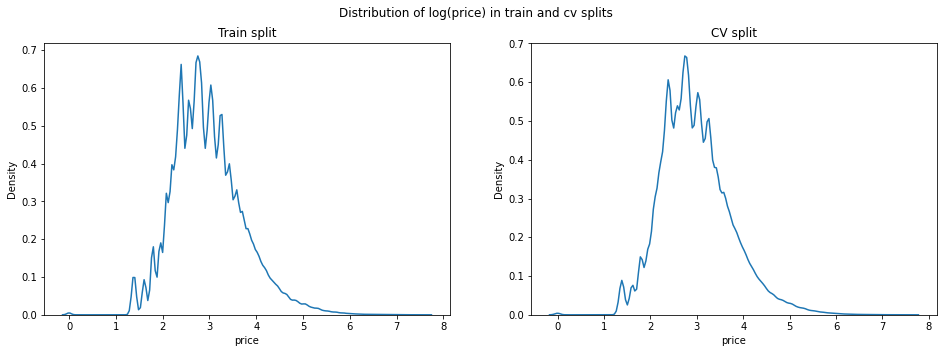

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.title("Train split")
sns.kdeplot(x=np.log1p(df_train["price"]))

plt.subplot(1,2,2)
plt.title("CV split")
sns.kdeplot(x=np.log1p(df_cv["price"]))

plt.suptitle("Distribution of log(price) in train and cv splits")
plt.show()

# Removing entries in train data where price is equal to 0 by considering them as outliers:


In [ ]:
df_train = df_train[df_train["price"] > 0]
df_train.shape

(1111245, 21)

# Perform log transformation of the target "Price" column:
**Even though the distribution is not log-normal, taking log of prices reduces the range of values to be predicted:**
- We can train the model to predict log(prices) and optimize for RMSE rather than optimizing for RMSLE directly because many models are well adapted to optimize RMSE than RMSLE. 
- We can then do exp(predicted_prices) to get the final price during inference.

ie;
- y_log = log(y + 1)
- model.fit(X, y_log)
- prediction_log = model.predict(X_test)
- prediction = exp(prediction_log) - 1

<br />

This idea is inspired from the Winners' solution to this problem: https://www.kaggle.com/c/mercari-price-suggestion-challenge/discussion/50256

In [ ]:
# +1 to make sure that price is not 0, since log(0) is undefined.
# (Adding 1 is not necessary for train data as we have already removed those 
# data, but might be needed for the cv split of the data.))
df_train['log_price'] = np.log1p(df_train['price'])

# drop the original "price" column since its not used anymore.
df_train.drop("price", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Combining multiple text columns together:

1. "item_name", "brand_name" and "item_description" is combined into a single "text" column.
2. "item_name" and "brand_name" is combined into a single "name_and_brand" column.

- This allows brand_names to be found from item’s name and description if its missing in brand_name column.
- This also makes it easier to process text and control featurization for text.
- Since "item_name" and "brand_name" fields in the data contain a short and brief info of the product, this could hold more value in itself. Hence this would be featurized again seperately.

This idea is inspired from the Winners' solution to this problem: https://www.kaggle.com/c/mercari-price-suggestion-challenge/discussion/50256

In [ ]:
# train data
df_train["preproc_text"] = df_train["preproc_name"] + " " + \
                            df_train["preproc_brand_name"] + " " + \
                             df_train["preproc_desc"]
df_train["preproc_name_and_brand"] = df_train["preproc_name"] + " " + \
                            df_train["preproc_brand_name"]

# cv data
df_cv["preproc_text"] = df_cv["preproc_name"] + " " + \
                          df_cv["preproc_brand_name"] + " " + \
                            df_cv["preproc_desc"]
df_cv["preproc_name_and_brand"] = df_cv["preproc_name"] + " " + \
                            df_cv["preproc_brand_name"]

# drop the columns that are not in use anymore.
df_train.drop(["preproc_desc", "preproc_name"], axis=1, inplace=True)
df_cv.drop(["preproc_desc", "preproc_name"], axis=1, inplace=True)

In [ ]:
# replace multiple whitespaces with a single space
df_train['preproc_text'] = df_train['preproc_text'].replace(r'\s+', ' ', regex=True)
df_cv["preproc_text"] = df_cv["preproc_text"].replace(r'\s+', ' ', regex=True)

df_train['preproc_name_and_brand'] = df_train['preproc_name_and_brand'].replace(r'\s+', ' ', regex=True)
df_cv["preproc_name_and_brand"] = df_cv["preproc_name_and_brand"].replace(r'\s+', ' ', regex=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111245 entries, 663947 to 429428
Data columns (total 21 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   train_id                     1111245 non-null  int64  
 1   item_condition_id            1111245 non-null  int64  
 2   shipping                     1111245 non-null  int64  
 3   main_cat                     1111245 non-null  object 
 4   subcat_1                     1111245 non-null  object 
 5   subcat_2                     1111245 non-null  object 
 6   missing_brand_name           1111245 non-null  int64  
 7   missing_item_desc            1111245 non-null  int64  
 8   preproc_brand_name           1111245 non-null  object 
 9   name_length                  1111245 non-null  int64  
 10  preproc_name_length          1111245 non-null  int64  
 11  name_word_count              1111245 non-null  int64  
 12  preproc_name_word_count      1111245 n

In [ ]:
df_cv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370634 entries, 1104058 to 667474
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   train_id                     370634 non-null  int64  
 1   item_condition_id            370634 non-null  int64  
 2   price                        370634 non-null  float64
 3   shipping                     370634 non-null  int64  
 4   main_cat                     370634 non-null  object 
 5   subcat_1                     370634 non-null  object 
 6   subcat_2                     370634 non-null  object 
 7   missing_brand_name           370634 non-null  int64  
 8   missing_item_desc            370634 non-null  int64  
 9   preproc_brand_name           370634 non-null  object 
 10  name_length                  370634 non-null  int64  
 11  preproc_name_length          370634 non-null  int64  
 12  name_word_count              370634 non-null  int64 

# Feature Engineering and Feature Selection:

Performing feature selection on some of the numerical features generated.

## Calculating brand_count data since this could  represent popularity of the brand and also influence the price: 

In [ ]:
# Extracting brand counts from train data split(to avoid data leakage).
brand_counts = df_train["preproc_brand_name"].value_counts().to_dict()

# train data
df_train["brand_count"] = df_train["preproc_brand_name"].apply(
                                     lambda x: brand_counts.get(x, 0))

# cv data
df_cv["brand_count"] = df_cv["preproc_brand_name"].apply(
                                     lambda x: brand_counts.get(x, 0))

# saving brand_counts
joblib.dump(brand_counts, "/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/brand_counts.joblib")
del brand_counts

## Calculating below statistics of log_price in the data that is obtained by grouping data on "item_condition_id", "shipping", "main_cat" and "preproc_brand_name" individually and all together:
- Min
- Max
- Mean
- Median
- Standard Deviation
- 25th and 75th percentile
- Difference between mean and median.Since this could represent how skewed the data is when grouped by 
those columns.

In [ ]:
# get list of possible combos of features to perform group_by aggregations
features = ["item_condition_id", "shipping", "preproc_brand_name", "main_cat"]
group_by_combos = dict()

combo_count = 1
for i in range(len(features)):
    for combo in list(map(list, combinations(features, i+1))):
        group_by_combos["combo_"+str(combo_count)] = combo
        combo_count += 1

display(group_by_combos)

{'combo_1': ['item_condition_id'],
 'combo_2': ['shipping'],
 'combo_3': ['preproc_brand_name'],
 'combo_4': ['main_cat'],
 'combo_5': ['item_condition_id', 'shipping'],
 'combo_6': ['item_condition_id', 'preproc_brand_name'],
 'combo_7': ['item_condition_id', 'main_cat'],
 'combo_8': ['shipping', 'preproc_brand_name'],
 'combo_9': ['shipping', 'main_cat'],
 'combo_10': ['preproc_brand_name', 'main_cat'],
 'combo_11': ['item_condition_id', 'shipping', 'preproc_brand_name'],
 'combo_12': ['item_condition_id', 'shipping', 'main_cat'],
 'combo_13': ['item_condition_id', 'preproc_brand_name', 'main_cat'],
 'combo_14': ['shipping', 'preproc_brand_name', 'main_cat'],
 'combo_15': ['item_condition_id',
  'shipping',
  'preproc_brand_name',
  'main_cat']}

In [ ]:
# create an aggregate dictionary
aggs = {}
# aggregation functions on log_price column
aggs["log_price"] = [np.min, np.mean, np.median, np.max, np.std, 
        (lambda x: np.mean(x) - np.median(x)), # mean - median
        (lambda x: np.percentile(x, 25)), # 25th percentile
        (lambda x: np.percentile(x, 75))] # 75th percentile

# names for the above stats, will be used for giving respective column names.
agg_stats_names = ["lg_pr_min", "lg_pr_mean", "lg_pr_median", "lg_pr_max", 
                  "lg_pr_std", "lg_pr_mean-median", "lg_pr_25_percentile", 
                  "lg_pr_75_percentile"]

# calculate the above mentioned statistics for each group by combo
grp_by_stats = {}
for combo_name, grp_by_combo in group_by_combos.items():
    agg_df = df_train.groupby(grp_by_combo).agg(aggs)
    agg_df = agg_df.reset_index()
    # remove the multi index columns that are created via group by and agg.
    # prefix combo name to the above column names
    cols_with_combo_name = list(map(lambda x: combo_name+"_"+x, 
                                    agg_stats_names))
    agg_df.columns = list(map(lambda x: x[0], agg_df.columns[:-8])) + \
                     cols_with_combo_name
    grp_by_stats[combo_name] = agg_df

In [ ]:
# example df of grp_by stats
grp_by_stats["combo_1"]

,item_condition_id,combo_1_lg_pr_min,combo_1_lg_pr_mean,combo_1_lg_pr_median,combo_1_lg_pr_max,combo_1_lg_pr_std,combo_1_lg_pr_mean-median,combo_1_lg_pr_25_percentile,combo_1_lg_pr_75_percentile
0,1,1.386294,2.974449,2.944439,7.605890,0.764203,0.030010,2.397895,3.433987
1,2,1.386294,3.004511,2.890372,7.603399,0.742006,0.114139,2.484907,3.401197
2,3,1.386294,2.976719,2.833213,7.601402,0.721404,0.143506,2.484907,3.367296
3,4,1.386294,2.895255,2.772589,7.177782,0.720771,0.122666,2.397895,3.295837
4,5,1.386294,3.106687,2.995732,6.259581,0.822449,0.110955,2.484907,3.610918


In [ ]:
# merge the stats obtained by various groupings into the main dataframe

# train data
for grp_name, grp_combo in group_by_combos.items():
    df_train = df_train.merge(grp_by_stats[grp_name],
                              how='left', 
                              on=grp_combo)

# fill 0 to any nan values that may have resulted when a particular combo value 
# present in the main dataframe is not found in any of the dataframes containing 
# group_by stats.
df_train.fillna(0, inplace=True)
# this is not necessary for train set but is needed for cv set as it may 
# contain unseen values for a group_by combo.

In [ ]:
df_train.shape

(1111245, 142)

In [ ]:
# saving grp_by_stats
joblib.dump(grp_by_stats, "grp_by_stats.joblib")
# grp_by_stats = joblib.load("grp_by_stats.joblib")
del grp_by_stats

# saving group_by_combos
joblib.dump(group_by_combos, "group_by_combos.joblib")
# group_by_combos = joblib.load("group_by_combos.joblib")
del group_by_combos

## Removing any constant or quasi constant numerical features via 'Variance Thresholding':
Since features which have constant or quasi constant values (ie; features with very low variances) may hold very less information.

In [ ]:
# getting all the numerical features into a seperate df to perform 
# feature selection.
num_feat_df = df_train.drop(["train_id","item_condition_id", "shipping", 
                             "main_cat", "subcat_1", "subcat_2", "bins",
                             "missing_brand_name", "missing_item_desc", 
                             "preproc_brand_name", "preproc_name_and_brand", 
                             "preproc_text"], axis=1)

In [ ]:
num_feat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111245 entries, 0 to 1111244
Columns: 130 entries, name_length to combo_15_lg_pr_75_percentile
dtypes: float64(125), int64(5)
memory usage: 1.1 GB


In [ ]:
# saving train and cv splits

df_train.to_csv("df_train.csv", index=False)
df_cv.to_csv("df_cv.csv", index=False)

# df_train = pd.read_csv("df_train.csv")
# df_cv = pd.read_csv("df_cv.csv")

In [ ]:
del df_train
del df_cv

In [ ]:
# when performing variance thresholding it is necessary to normalize the data
# and bring all of the features to the same scale.
# Ref: https://stats.stackexchange.com/a/259420

# But here since i'm trying to just check the constant and quasi constants, I 
# will be ignoring the min-max scaling.

vt = VarianceThreshold()
vt.fit(num_feat_df)
const_features = num_feat_df.columns[~vt.get_support()]
print("Constant or quasi constant numerical features: ", const_features)

Constant or quasi constant numerical features:  Index(['combo_1_lg_pr_min', 'combo_4_lg_pr_min'], dtype='object')


In [ ]:
# We can see that the below hold no info since their variance is very low

print("Constant and Quasi Constant features:")
for feat in const_features:
    print(feat+": ", num_feat_df[feat].var())

Constant and Quasi Constant features:
combo_1_lg_pr_min:  3.1554464604436946e-30
combo_4_lg_pr_min:  3.1554464604436946e-30


In [ ]:
num_feat_df.drop(const_features, axis=1, inplace=True)

## Plotting Correlation Matrix:
Finding features correlated with log_price.

In [ ]:
# Features correlated with log_price. Here I'm using Pearson correlation 
# coefficient. Here I'm using a threshold of 0.5
corr_features = [column for column in num_feat_df.columns if np.abs(np.corrcoef(
                num_feat_df[column], num_feat_df['log_price'])[0][1]) >= 0.5]

In [ ]:
print("No. of features which are correlated, ie; with log_price with pearson "
"correlation co-efficient >=0.5: ", len(corr_features)-1)
corr_features

No. of features which are correlated, ie; with log_price with pearson correlation co-efficient >=0.5:  23


['log_price',
 'combo_6_lg_pr_mean',
 'combo_6_lg_pr_median',
 'combo_8_lg_pr_mean',
 'combo_8_lg_pr_median',
 'combo_8_lg_pr_25_percentile',
 'combo_8_lg_pr_75_percentile',
 'combo_10_lg_pr_mean',
 'combo_11_lg_pr_mean',
 'combo_11_lg_pr_median',
 'combo_11_lg_pr_25_percentile',
 'combo_11_lg_pr_75_percentile',
 'combo_13_lg_pr_mean',
 'combo_13_lg_pr_median',
 'combo_13_lg_pr_25_percentile',
 'combo_13_lg_pr_75_percentile',
 'combo_14_lg_pr_mean',
 'combo_14_lg_pr_median',
 'combo_14_lg_pr_25_percentile',
 'combo_14_lg_pr_75_percentile',
 'combo_15_lg_pr_mean',
 'combo_15_lg_pr_median',
 'combo_15_lg_pr_25_percentile',
 'combo_15_lg_pr_75_percentile']

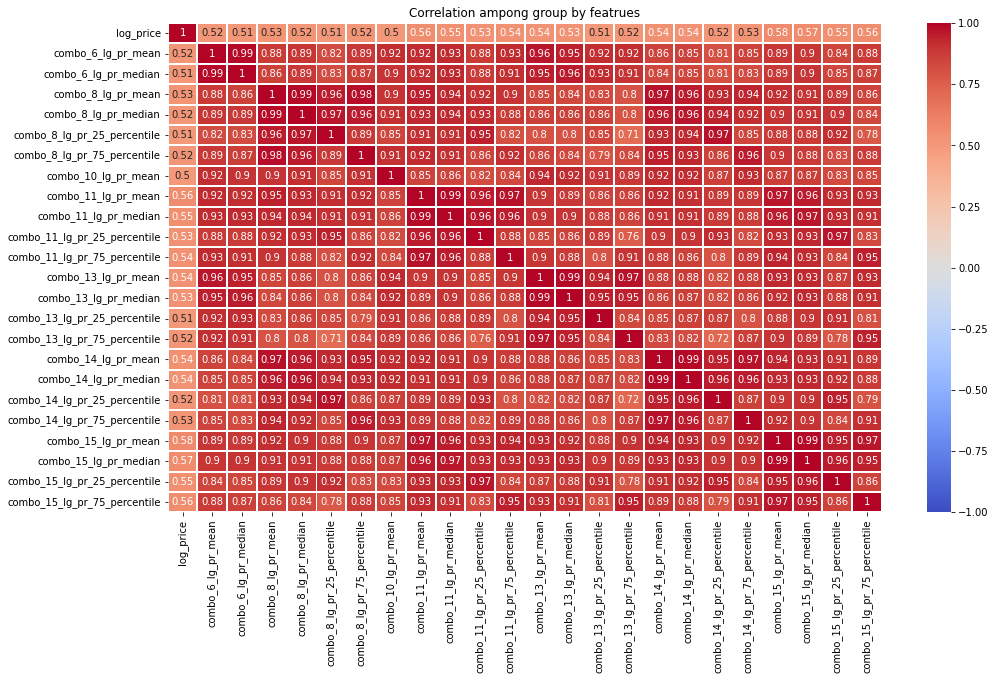

In [ ]:
plt.figure(figsize=(16, 9))
plt.title("Correlation ampong group by featrues")

sns.heatmap(num_feat_df.loc[:, corr_features].corr(), cmap="coolwarm",
            vmin=-1, vmax=1, xticklabels=corr_features, 
            yticklabels=corr_features, annot=True, linewidths=1)

- The above features in addition to being corelated with "log_price" are also correlated heavily among themselves.
- One way we could reduce this correlation of variables among themselves is by doing a PCA. This results in features that are less correlated among themselves and we could choose the top n PCA transformed features which hold the most amount of variance.

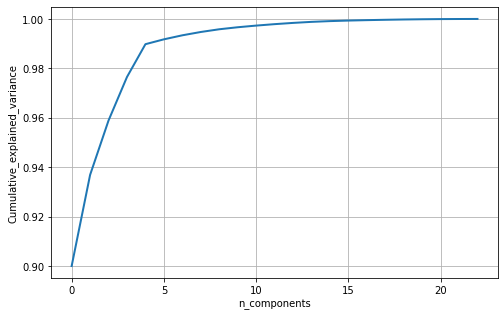

In [ ]:
# initializing the pca
pca = PCA()

# PCA for dimensionality redcution
pca.n_components = len(corr_features)-1
pca_data = pca.fit_transform(num_feat_df.loc[:, corr_features].drop(
    "log_price", axis=1))

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(8, 5))
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

- Above plot shows that we could select the top 15 PCA transformed features and still maintain almost full variance of the original data 

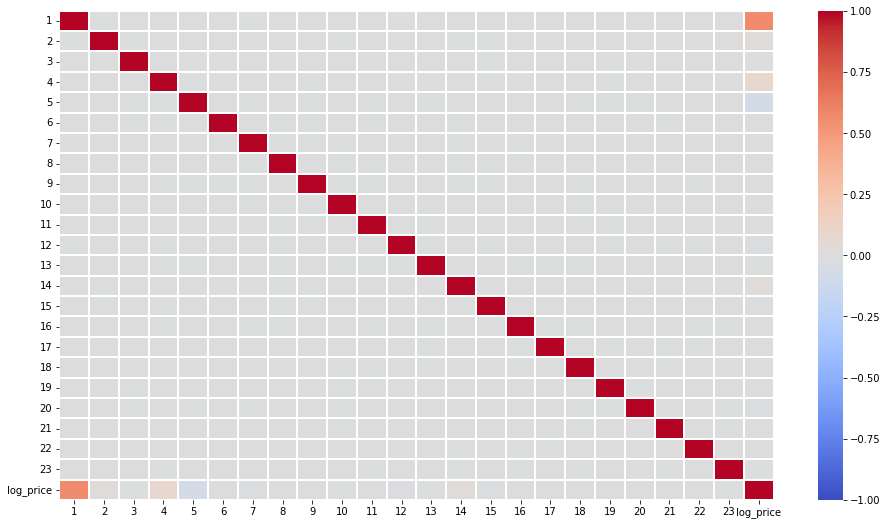

In [ ]:
pca_data = pd.DataFrame(data=pca_data, columns=range(1, pca_data.shape[1]+1))
pca_data["log_price"] = num_feat_df["log_price"]

plt.figure(figsize=(16, 9))
sns.heatmap(pca_data.corr(), cmap="coolwarm",
            vmin=-1, vmax=1, xticklabels=pca_data.columns, 
            yticklabels=pca_data.columns, annot=False, linewidths=1)

- And also the PCA transformed features are less correlated among themselves.
- But using PCA features means that the features are not interpretable anymore.

## Scaling the numerical features before trying Model based feature selection technique:

In [ ]:
target = num_feat_df['log_price']

# scaling features
scaled_num_features = StandardScaler().fit_transform(
    num_feat_df.drop("log_price", axis=1))

# converting to df
scaled_num_features = pd.DataFrame(
    data=scaled_num_features,
    columns=num_feat_df.drop('log_price', axis=1).columns)

## Model based feature selection:
**L1 (Lasso) Penalization**. 

When we have L1 penalization for regularization, most of the coefficients will be 0 (or close to 0) for not so important features, and we select the features with non-zero coefficients.

In [ ]:
scaled_num_features

,name_length,preproc_name_length,name_word_count,preproc_name_word_count,log_desc_length,log_preproc_desc_length,log_desc_word_count,log_preproc_desc_word_count,brand_count,combo_1_lg_pr_mean,...,combo_14_lg_pr_25_percentile,combo_14_lg_pr_75_percentile,combo_15_lg_pr_min,combo_15_lg_pr_mean,combo_15_lg_pr_median,combo_15_lg_pr_max,combo_15_lg_pr_std,combo_15_lg_pr_mean-median,combo_15_lg_pr_25_percentile,combo_15_lg_pr_75_percentile
0,0.023809,0.004900,0.717866,0.255136,0.475710,0.438063,0.520912,0.470706,1.158803,-0.363975,...,-0.873742,-0.114743,-1.103565,-0.287431,-0.322957,1.386994,1.185960,0.349524,-0.608816,0.203295
1,1.333249,1.394182,0.185007,0.255136,-0.123279,-0.048366,-0.558338,-0.411719,-0.892479,1.248830,...,2.886643,2.150361,-0.543042,2.454626,2.200393,0.532229,0.025860,0.621861,2.646369,2.102324
2,-0.303552,-0.110874,-0.347852,-0.317049,0.531285,0.624213,0.572491,0.646289,1.158803,-0.363975,...,0.038178,-0.114743,0.637578,0.034687,0.051115,0.507514,-0.333079,-0.120709,0.167434,-0.081028
3,0.242049,0.120673,0.717866,0.827321,0.331391,0.407152,0.376362,0.562493,1.158803,-0.363975,...,-0.873742,-0.114743,-1.103565,-0.287431,-0.322957,1.386994,1.185960,0.349524,-0.608816,0.203295
4,-0.303552,-0.110874,0.185007,0.255136,-0.221973,-0.194034,-0.387607,-0.411719,-0.732355,-0.242175,...,0.393053,0.453256,0.637578,0.289616,0.268970,-0.235832,-0.246472,0.012890,0.326603,0.203295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111240,-1.067392,-1.037062,-0.880710,-0.889233,-0.916348,-0.798284,-0.903308,-0.864352,-0.732355,1.248830,...,0.038178,0.187631,-1.103565,0.383525,0.319601,-0.097466,0.235705,0.253700,0.363826,0.511043
1111241,-1.831232,-1.847476,-1.413569,-1.461418,-1.079381,-0.932112,-1.248278,-1.079248,1.158803,-0.363975,...,-0.160320,-0.283189,0.637578,-0.076409,-0.190993,0.831329,0.031360,0.772978,-0.188195,-0.081028
1111242,-0.849152,-0.921288,-1.413569,-1.461418,0.125008,0.047812,0.077392,-0.105036,-0.903241,1.248830,...,2.348345,1.874492,1.198102,2.240359,2.442501,-0.794201,-0.715700,-2.240780,2.701962,1.937590
1111243,1.442369,1.394182,0.717866,1.399505,0.803470,0.758042,0.810972,0.759719,-0.751948,1.248830,...,0.038178,-0.197346,-1.103565,-0.308589,-0.322957,-0.391410,-0.465069,0.221488,-0.003535,-0.411025


In [ ]:
model = Lasso(alpha=0.001, random_state=30)

# select from the model
sfm = SelectFromModel(estimator=model)
X_transformed = sfm.fit_transform(scaled_num_features, target)

# see which features were selected
# get feature names
print([(x, y, z) for x, y, z in zip(scaled_num_features.columns, 
                                 sfm.get_support(), 
                                 sfm.estimator_.coef_)
])

[('name_length', True, 0.0945655978149365), ('preproc_name_length', True, -0.08317913003840437), ('name_word_count', True, 0.016999389842370927), ('preproc_name_word_count', False, 0.0), ('log_desc_length', True, -0.04380309125379829), ('log_preproc_desc_length', False, -0.0), ('log_desc_word_count', False, -0.0), ('log_preproc_desc_word_count', True, 0.1100776768891037), ('brand_count', True, -0.0003209223589578717), ('combo_1_lg_pr_mean', False, 0.0), ('combo_1_lg_pr_median', False, -0.0), ('combo_1_lg_pr_max', True, -0.0009353145748039532), ('combo_1_lg_pr_std', False, -0.0), ('combo_1_lg_pr_mean-median', False, 0.0), ('combo_1_lg_pr_25_percentile', True, 0.011725823076356771), ('combo_1_lg_pr_75_percentile', True, -0.0022449619333988), ('combo_2_lg_pr_min', False, 0.0), ('combo_2_lg_pr_mean', False, 0.0), ('combo_2_lg_pr_median', False, 0.0), ('combo_2_lg_pr_max', False, 0.0), ('combo_2_lg_pr_std', False, -0.0), ('combo_2_lg_pr_mean-median', False, 0.0), ('combo_2_lg_pr_25_percenti

In [ ]:
sfm.threshold_

1e-05

In [ ]:
lasso_selected_features = [
    x for x, y in zip(
        num_feat_df.drop("log_price", axis=1).columns, sfm.get_support()) if y == True
]
coefficients = [
    x for x, y in zip(sfm.estimator_.coef_, sfm.get_support()) if y == True
]

indices = np.argsort(coefficients)
lasso_selected_features = np.array(lasso_selected_features)[indices]
print("No. of features selected by Lasso model: ", len(lasso_selected_features))
lasso_selected_features

No. of features selected by Lasso model:  25


array(['preproc_name_length', 'log_desc_length',
       'combo_1_lg_pr_75_percentile', 'combo_4_lg_pr_max',
       'combo_8_lg_pr_max', 'combo_1_lg_pr_max',
       'combo_9_lg_pr_mean-median', 'brand_count', 'combo_3_lg_pr_min',
       'combo_4_lg_pr_25_percentile', 'combo_15_lg_pr_75_percentile',
       'combo_10_lg_pr_median', 'combo_7_lg_pr_mean',
       'combo_7_lg_pr_median', 'combo_11_lg_pr_mean-median',
       'combo_6_lg_pr_25_percentile', 'combo_11_lg_pr_mean',
       'combo_5_lg_pr_25_percentile', 'combo_14_lg_pr_mean',
       'combo_12_lg_pr_75_percentile', 'combo_1_lg_pr_25_percentile',
       'name_word_count', 'name_length', 'log_preproc_desc_word_count',
       'combo_15_lg_pr_mean'], dtype='<U28')

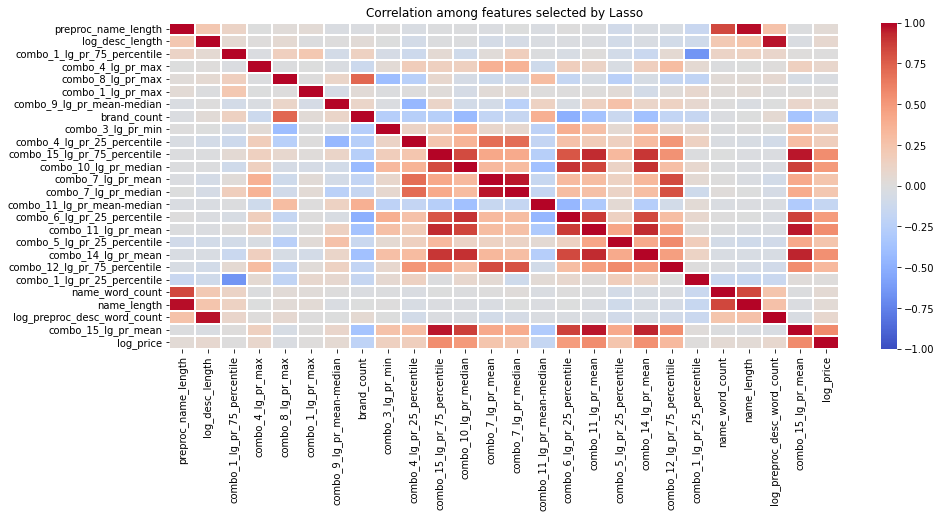

In [ ]:
plt.figure(figsize=(15, 6))

plt.title("Correlation among features selected by Lasso")
sns.heatmap(num_feat_df.loc[:,list(lasso_selected_features)+["log_price"]].corr(), cmap="coolwarm",
            vmin=-1, vmax=1, xticklabels=num_feat_df.loc[:,list(lasso_selected_features)+["log_price"]].columns, 
            yticklabels=num_feat_df.loc[:,list(lasso_selected_features)+["log_price"]].columns, annot=False, linewidths=1)
plt.show()

- The above features were seletected from lasso based penalization using a threshold of 1e-05.

Moving forward with the set of features selected using the Lasso model based feature selection technique, since the features will be a bit interpretable and the features that were selected via Lasso model are a result of interaction between different features in the model fitting process.

In [ ]:
grp_by_stats = joblib.load("grp_by_stats.joblib")
group_by_combos = joblib.load("group_by_combos.joblib")

In [ ]:
# Removing any group_by combos that aren't required annymore
group_by_combos = {key: group_by_combos[key] 
                    for key in group_by_combos
                        if any(key in s for s in lasso_selected_features)}

# Removing any group_by stats that aren't required annymore
grp_by_stats = {key: grp_by_stats[key].loc[:, 
        list(grp_by_stats[key].columns.intersection(lasso_selected_features))
        + group_by_combos[key]] for key in group_by_combos}

In [ ]:
# saving grp_by_stats
joblib.dump(grp_by_stats, "/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/grp_by_stats.joblib")
# grp_by_stats = joblib.load("/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/grp_by_stats.joblib")

# saving group_by_combos
joblib.dump(group_by_combos, "/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/group_by_combos.joblib")
# group_by_combos = joblib.load("/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/group_by_combos.joblib")

['/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/group_by_combos.joblib']

In [ ]:
del num_feat_df
del corr_features
del pca_data
del scaled_num_features
del target
del X_transformed
del vt
del pca
gc.collect()

6509

In [ ]:
df_train = pd.read_csv("df_train.csv", na_filter=False)
df_cv = pd.read_csv("df_cv.csv", na_filter=False)

In [ ]:
df_train = df_train[
                ["train_id","item_condition_id", "shipping", "main_cat", 
                 "subcat_1", "subcat_2", "missing_brand_name", "bins",
                 "missing_item_desc", "preproc_brand_name", 
                 "preproc_name_and_brand", "preproc_text", 
                 "log_price"] + list(lasso_selected_features)]

In [ ]:
# storing list of lasso selected features
joblib.dump(list(lasso_selected_features), "/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/lasso_selected_features.joblib")
# lasso_selected_features = joblib.load("/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/lasso_selected_features.joblib")

['/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/lasso_selected_features.joblib']

## Performing featurizations on cv split using the stats from train data:


In [ ]:
df_cv = df_cv.loc[:, 
            df_cv.columns.intersection(list(df_train.columns)+["price"])]

In [ ]:
# group_by stats for cv data
for grp_name, grp_combo in group_by_combos.items():
    df_cv = df_cv.merge(grp_by_stats[grp_name], how='left', on=grp_combo)

# fill 0 to any nan values that may have resulted when a particular combo value 
# present in the main dataframe is not found in any of the dataframes containing 
# group_by stats.
df_cv.fillna(0, inplace=True)
# this is not necessary for train set but is needed for cv set as it may 
# contain unseen values for a group_by combo.

In [ ]:
# dropping "preproc_brand_name", since its already merged into "preproc_text"
df_train.drop("preproc_brand_name", axis=1, inplace=True)
df_cv.drop("preproc_brand_name", axis=1, inplace=True)

In [ ]:
assert (set(df_train.drop("log_price", axis=1).columns) == 
        set(df_cv.drop("price", axis=1).columns))

In [ ]:
df_train.to_csv("/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/df_train.csv", index=False)
df_cv.to_csv("/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/df_cv.csv", index=False)

In [ ]:
df_train1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/df_train.csv", na_filter=False)
df_cv1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/df_cv.csv", na_filter=False)

**The final list of complete information necessary is as follows:**

In [ ]:
# indicators
ind_cols = ['item_condition_id', 'missing_brand_name', 'missing_item_desc']

# Categories and Shipping ID
cats_and_shipping = ['main_cat', 'subcat_1', 'subcat_2', 'shipping']

# text columns
text_cols = ['preproc_name_and_brand', 'preproc_text']

# length and count based features
count_feats = ['preproc_name_length', 'log_desc_length', 'brand_count', 
               'name_word_count', 'name_length', 'log_preproc_desc_word_count']

# group_by features
grp_by_features = [
    'combo_1_lg_pr_75_percentile', 'combo_4_lg_pr_max', 'combo_8_lg_pr_max', 
    'combo_1_lg_pr_max', 'combo_9_lg_pr_mean-median', 'combo_3_lg_pr_min', 
    'combo_4_lg_pr_25_percentile', 'combo_15_lg_pr_75_percentile',
    'combo_10_lg_pr_median', 'combo_7_lg_pr_mean', 'combo_7_lg_pr_median',
    'combo_11_lg_pr_mean-median', 'combo_6_lg_pr_25_percentile',
    'combo_11_lg_pr_mean', 'combo_5_lg_pr_25_percentile', 'combo_14_lg_pr_mean',
    'combo_12_lg_pr_75_percentile', 'combo_1_lg_pr_25_percentile', 'combo_15_lg_pr_mean']

final_features = {
    "ind_cols": ind_cols, "cats_and_shipping": cats_and_shipping,
    "text_cols": text_cols, "count_feats": count_feats,
    "grp_by_features": grp_by_features
}

joblib.dump(final_features, "/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/final_features.joblib")

['/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/final_features.joblib']

# Creating multiple datasets with different featurizations:
The idea is to diversify the vectorization of data along with diversifying the models for ensembling. 

ie; Train different models on different vectorizations of dataset. Allow the models to slightly overfit to reach different minima by means of different random model initializations and then by random order of the batches and size of batches(small and large) during training.

The combined ensemble model may give better results. (inspired from kaggle winner’s 
solution: [link](https://youtu.be/QFR0IHbzA30))

Datasets:
- **Dataset Set 1**: One hot encoded categories and shipping_id, Ordinal encoded item_condition_id + TFIDF encoded text with bigrams + other numerical features obtained from feature engineering.
- **Dataset Set 2**: Target encoded categories and shipping_id, Ordinal encoded item_condition_id + BOW encoded text with bigrams + other numerical features obtained from feature engineering.

## Target Encoding of categorical features:
- shipping_id
- categories

### Target encoding with smoothing to reduce overfitting:
The Sklearn’s contrib package provides functionality to perform target encoding 
with smoothing: 

https://contrib.scikit-learn.org/category_encoders/targetencoder.html


- Target encodings of categorical values are usually prone to overfitting to train data. The idea here is to reduce overfitting by introducing some sort of regularization instead of using a vanilla target encoding. 
- There are different techniques to perform target encoding by introducing regularization, one popular smoothing technique is to take a combination of the mean of target for the category and the global target mean for each data point. 
- This technique is particularly useful to handle 
situations when there are very few datapoints for some of the categories. The scikit-learn contrib package’s current implementation is as shown below:

<center>$val$ = $\bar{y}$ * (1-$\lambda$) + $\bar{ycat}$ * $\lambda$</center>

where,
- $\bar{y}$ - is the overall mean of y
- $\bar{ycat}$ - is your estimated mean of y after grouping by categories.
- $\lambda$ - is a “weight” param.

Ref: 
- [category_encoders/category_encoders/target_encoder](https://github.com/scikit-learn-contrib/category_encoders/blob/55636b5ae11dc45075a0c248028f17f9df93bbb9/category_encoders/target_encoder.py#L170)
- [AAAML](https://github.com/abhishekkrthakur/approachingalmost/blob/master/AAAMLP.pdf)

In [ ]:
target_encoder = TargetEncoder(cols=['main_cat', 'subcat_1', 'subcat_2', 
                                     'shipping'], smoothing=0.8) 
# smoothing param was chosen arbitrarily, higher value means stronger regularization.

# fit encoder on train data
target_encoder.fit(df_train.loc[:, ['main_cat', 'subcat_1', 'subcat_2', 
                                     'shipping']], df_train["log_price"])

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


TargetEncoder(cols=['main_cat', 'subcat_1', 'subcat_2', 'shipping'],
              smoothing=0.8)

In [ ]:
# saving target_encoder
joblib.dump(target_encoder, "/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/target_encoder.joblib")
# target_encoder = joblib.load("/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/target_encoder.joblib")
del target_encoder

## One-Hot encoding of categorical features:
(categorical features except 'item_condition_id' which is ordinal, so moving with ordinal encding for it.)  

In [ ]:
data_df = pd.read_csv("data_df.csv", na_filter=False)

# Getting categories from whole data, since the available product categories
# could be predifined in the platform.
main_cat = list(sorted(data_df["main_cat"].unique()))
subcat_1 = list(sorted(data_df["subcat_1"].unique()))
subcat_2 = list(sorted(data_df["subcat_2"].unique()))
shipping = list(sorted(data_df["shipping"].unique()))
categories = [main_cat, subcat_1, subcat_2, shipping]

del data_df

one_hot_encoder = OneHotEncoder(categories=categories, drop='if_binary')
# fit encoder on train data
one_hot_encoder.fit(df_train.loc[:,
                    ["main_cat", "subcat_1", "subcat_2", "shipping"]])

OneHotEncoder(categories=[['Beauty', 'Electronics', 'Handmade', 'Home', 'Kids',
                           'Men', 'Other', 'Sports & Outdoors',
                           'Vintage & Collectibles', 'Women', 'no_main_cat'],
                          ['Accessories', 'Antique', 'Apparel', 'Art',
                           'Artwork', 'Athletic Apparel', 'Automotive',
                           'Bags and Purses', 'Bath', 'Bath & Body',
                           'Bathing & Skin Care', 'Bedding',
                           'Blazers & Sport Coats', 'Book', 'Books',
                           'Books and Zines'...
                           'Accessories', 'Accessory', 'Aceo', 'Action Figure',
                           'Action Figures & Statues', 'Action, Adventure',
                           'Activity Centers & Entertainers', 'Advertisement',
                           'Afghan', 'Air Conditioners', 'Air Fresheners',
                           'Air Purifiers', 'All Other Sports',
              

In [ ]:
# saving one_hot_encoder
joblib.dump(one_hot_encoder, "/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/one_hot_encoder.joblib")
# one_hot_encoder = joblib.load("/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/one_hot_encoder.joblib")
del one_hot_encoder

**Note:**
- An assumption made is that the categories in the mercari platform are predefined, hence the train and cv data is being combined to get all the unique categories. If that's not the case then we should not combine the train and cv data as it would lead to data leakage.
- A procedure that could be tried when the categories are not predefined is to basically have a threshold for the number of times a category appears and use it to bin all the categories that appear very few number of times into a special "Rare" category. This would also allow us to handle any new categories that could appear when the model is in production. If this trick doesn't yield good results we can just ignore the new unknown categories that appear in the production.  

## Encoding Text:

Since "item_name" and "brand_name" fields in the data contain a short and brief info of the product, this could hold more value in itself. Hence the preprocessed item name and preprocessed brand name is encoded seperately apart from the text data that was obtained by combining preprocessed item name, preprocessed brand name and preprocessed description.

### Bag Of Words:

In [ ]:
# initialize CountVectorizer with word_tokenize from nltk as the tokenizer.
# This will also allow to have any special characters like exclamation that were
# not removed intentionally.
ctv_text = CountVectorizer(tokenizer=word_tokenize, token_pattern=None, 
                      min_df=10, max_df=0.9, max_features=100000,
                      ngram_range=(1, 2))

# fit the vectorizer on train data
ctv_text.fit(df_train["preproc_text"])

# when the number of tokens is limited via max_features parameter in the BOW or 
# TFIDF vectorizers there is a possibility that the important tokens from item 
# name and brand name will be discarded. Hence to avoid this, item name and 
# brand name is encoded again seperately.

# item name and brand:
ctv_name_and_brand = CountVectorizer(
    tokenizer=word_tokenize, token_pattern=None, min_df=10, max_df=0.9,
    max_features=100000, ngram_range=(1, 2))

# fit the vectorizer on train data
ctv_name_and_brand.fit(df_train["preproc_name_and_brand"])

CountVectorizer(max_df=0.9, max_features=100000, min_df=10, ngram_range=(1, 2),
                token_pattern=None,
                tokenizer=<function word_tokenize at 0x7fb6afa17a70>)

In [ ]:
# saving ctv
joblib.dump(ctv_text, "/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/ctv_text.joblib")
# ctv_text = joblib.load("/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/ctv_text.joblib")
del ctv_text

joblib.dump(ctv_name_and_brand, "/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/ctv_name_and_brand.joblib")
# ctv_name_and_brand = joblib.load("/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/ctv_name_and_brand.joblib")
del ctv_name_and_brand

### TFIDF Vectorization:

In [ ]:
# initialize TfidfVectorizer with word_tokenize from nltk as the tokenizer.
# This will also allow to have any special characters like exclamation that were
# not removed intentionally.
tfv_text = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None, 
                      min_df=10, max_df=0.9, max_features=100000,
                      ngram_range=(1, 2))

# fit the vectorizer on train data
tfv_text.fit(df_train["preproc_text"])

# when the number of tokens is limited via max_features parameter in the BOW or 
# TFIDF vectorizers there is a possibility that the important tokens from item 
# name and brand name will be discarded. Hence to avoid this, item name and 
# brand name is encoded again seperately.

# item name and brand name:
tfv_name_and_brand = TfidfVectorizer(
    tokenizer=word_tokenize, token_pattern=None, min_df=10, max_df=0.9, 
     max_features=100000, ngram_range=(1, 2))

# fit the vectorizer on train data
tfv_name_and_brand.fit(df_train["preproc_name_and_brand"])

TfidfVectorizer(max_df=0.9, max_features=100000, min_df=10, ngram_range=(1, 2),
                token_pattern=None,
                tokenizer=<function word_tokenize at 0x7fb6afa17a70>)

In [ ]:
# saving tfv
joblib.dump(tfv_text, "/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/tfv_text.joblib")
# tfv_text = joblib.load("/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/tfv_text.joblib")
del tfv_text

joblib.dump(tfv_name_and_brand, "/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/tfv_name_and_brand.joblib")
# tfv_name_and_brand = joblib.load("/content/drive/MyDrive/Colab Notebooks/AppliedAI/Assignments/CS-1-MERCARI/featurizers/tfv_name_and_brand.joblib")
del tfv_name_and_brand

**Note:**

Here max_features=100000 with min_df=10 and max_df=0.9 for both CountVectorizer and TfidfVectorizer. These numbers were chosen arbitrarily. There are better ways to limit the number of tokens (OR) ways reduce the reduce dimensionality of text data. Few such procedures can be found below:
 - https://towardsdatascience.com/dimensionality-reduction-with-latent-dirichlet-allocation-8d73c586738c
 - https://uksim.info/icaiet2014/CD/data/7910a069.pdf
 - https://www.sciencedirect.com/science/article/pii/S2667096822000052
 - Another simple approach could be to make the params "min_df", "max_df" and "max_features" as hyperparameters to tune, but this would take a lot of time while tuning.